
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0.0,
    ),
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

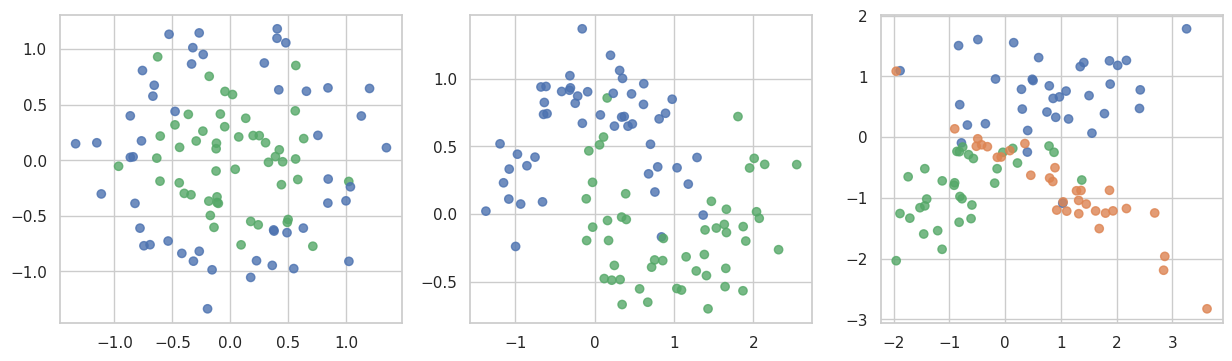

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

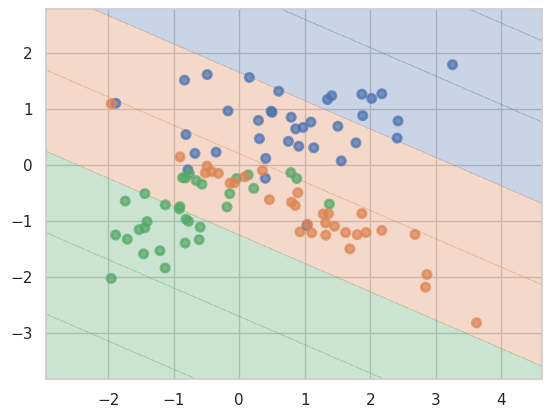

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1: Accuracy on train set: 1.000, on test set: 0.733
Dataset 2: Accuracy on train set: 1.000, on test set: 0.867
Dataset 3: Accuracy on train set: 1.000, on test set: 0.833


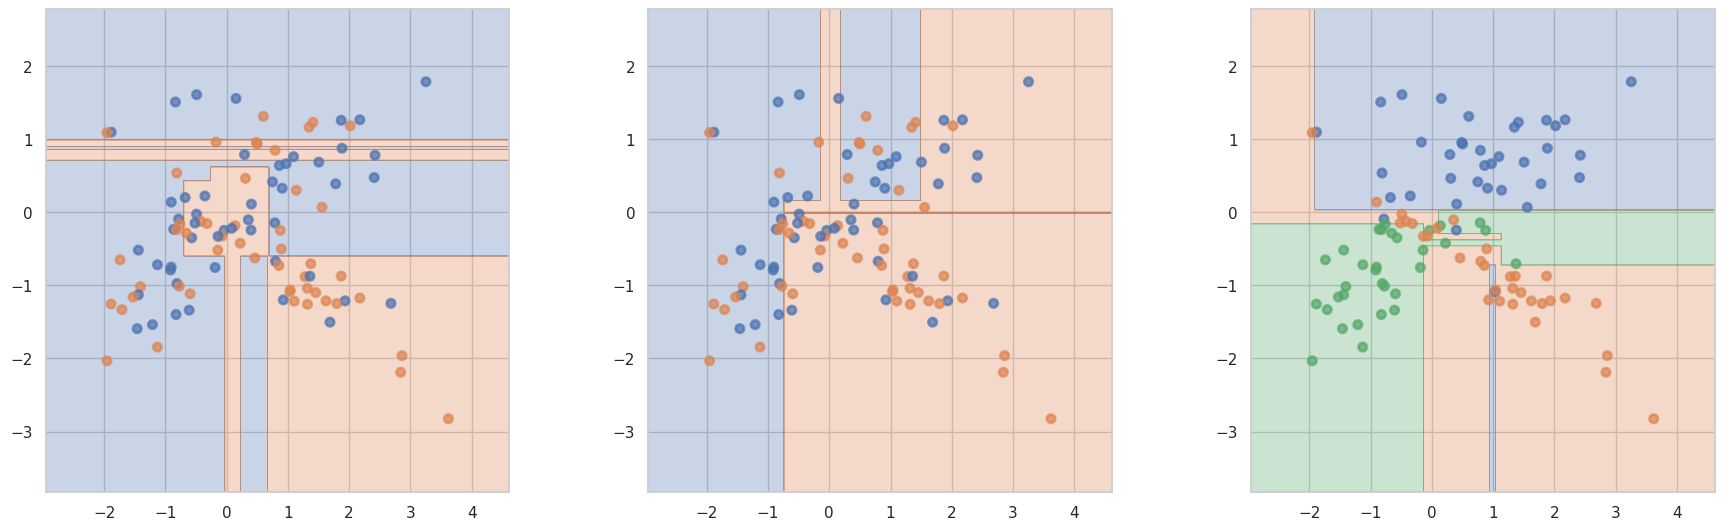

In [ ]:
plt.figure(figsize=(18, 6))

for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier().fit(X_train, y_train)

    plt.subplot(1, 3, i + 1)
    plot_surface(clf, X, y)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    acc_train = clf.score(X_train, y_train)
    acc_test = clf.score(X_test, y_test)
    print(f'Dataset {i + 1}: Accuracy on train set: {acc_train:.3f}, on test set: {acc_test:.3f}')

__Ответ:__  переобучение решающих деревьев есть, т.к. Accuracy на обучающей выборке равна 1.0 для всех датасетов, в то время как на тестовой выборке значения accuracy ниже, еще и скачет, а не равномерно повышается.

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

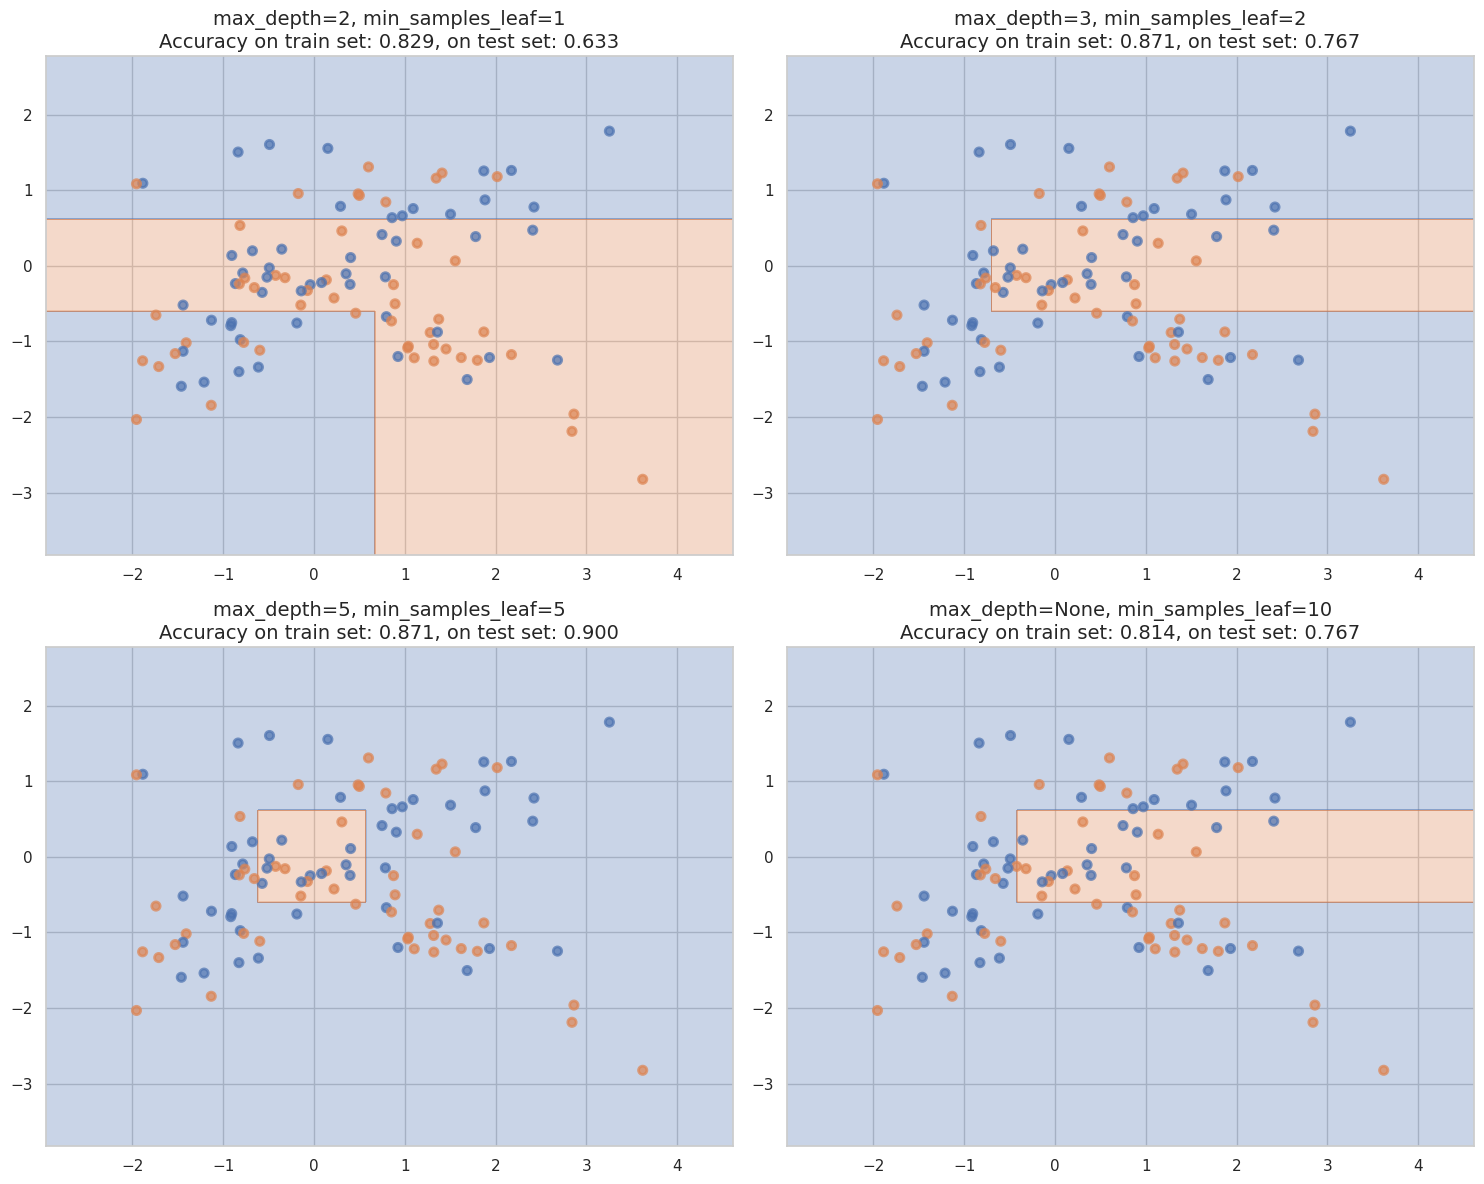

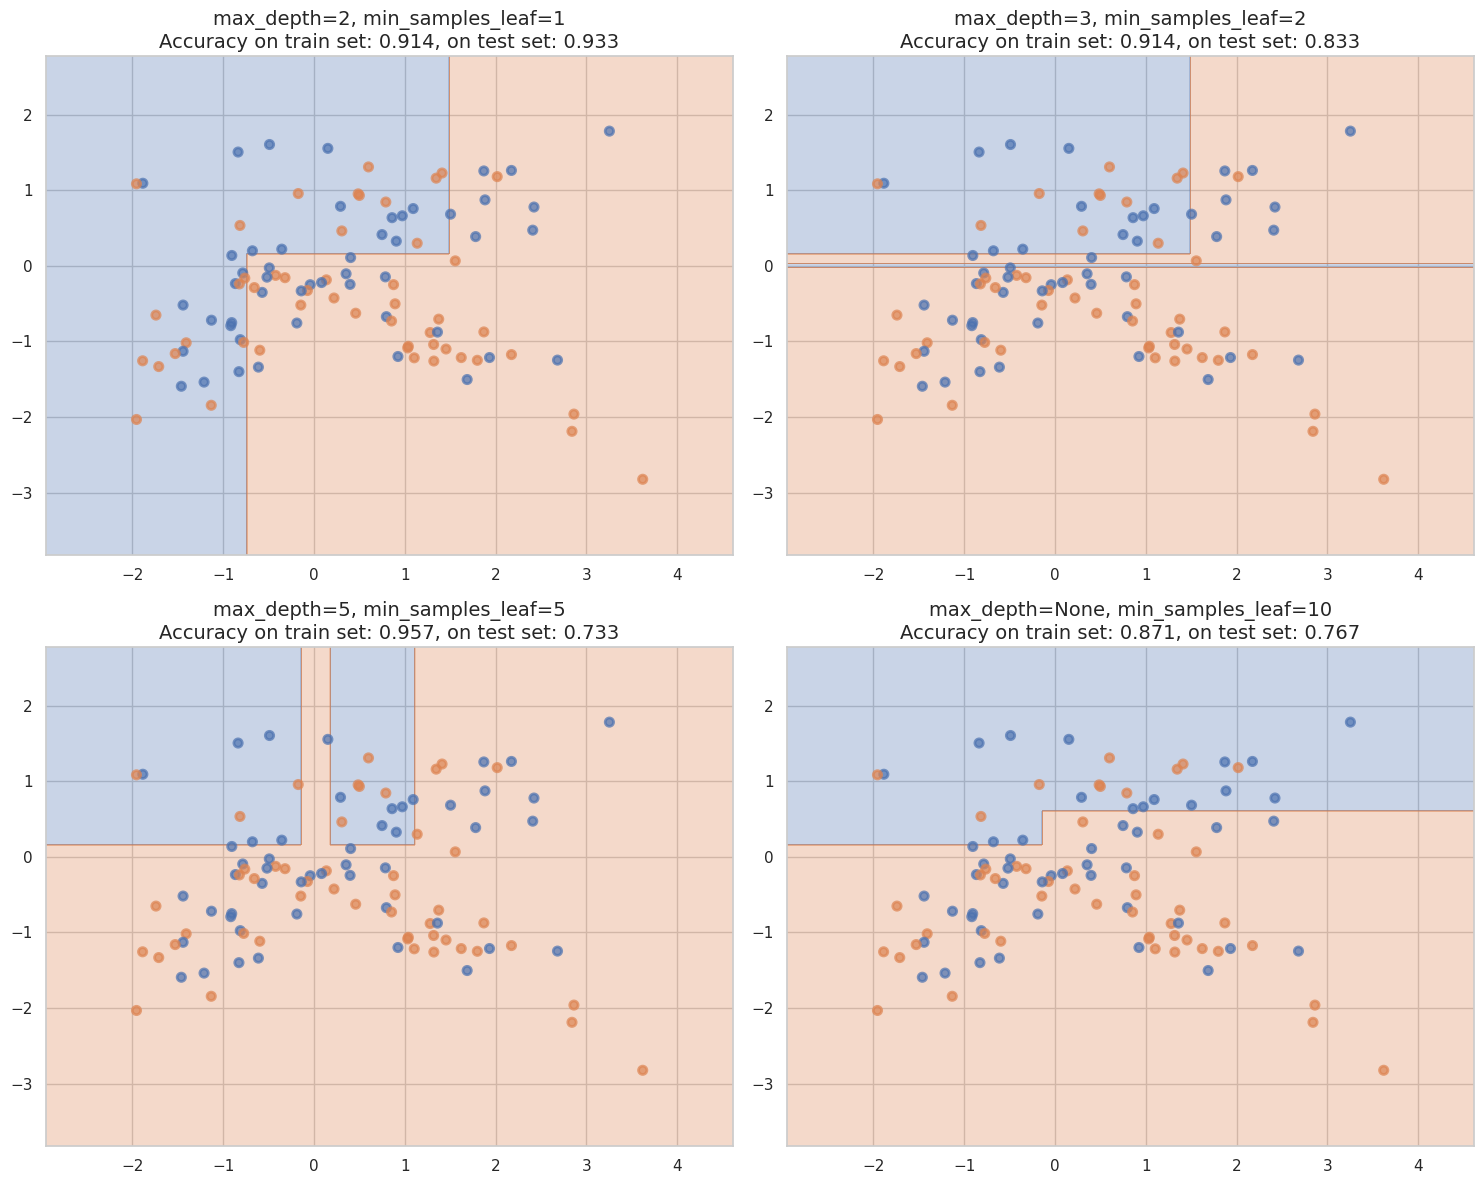

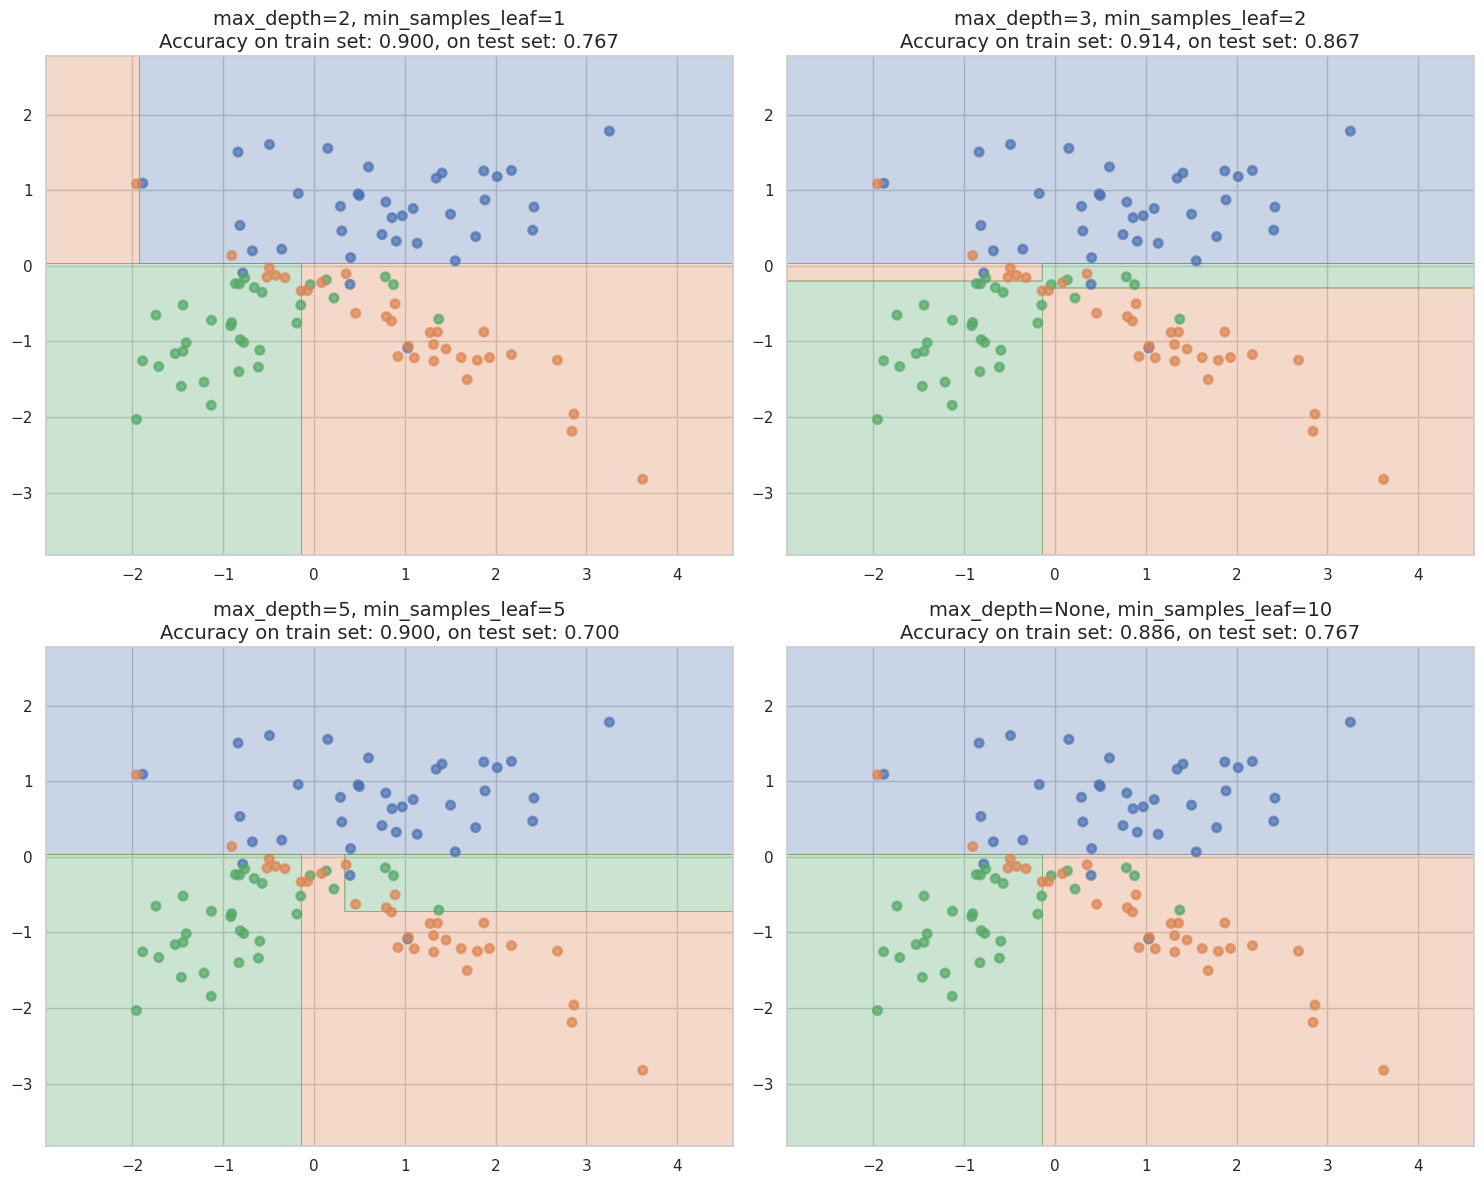

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

params = [
    {'max_depth': 2, 'min_samples_leaf': 1},
    {'max_depth': 3, 'min_samples_leaf': 2},
    {'max_depth': 5, 'min_samples_leaf': 5},
    {'max_depth': None, 'min_samples_leaf': 10},
]

for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    plt.figure(figsize=(15, 12))

    for j, param in enumerate(params):
        plt.subplot(2, 2, j + 1)

        clf = DecisionTreeClassifier(**param).fit(X_train, y_train)

        plot_surface(clf, X, y)

        acc_train = clf.score(X_train, y_train)
        acc_test = clf.score(X_test, y_test)
        title = f'max_depth={param["max_depth"]}, min_samples_leaf={param["min_samples_leaf"]}\nAccuracy on train set: {acc_train:.3f}, on test set: {acc_test:.3f}'
        plt.title(title, fontsize=14)

    plt.tight_layout()
    plt.show()

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [ ]:
import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Находит оптимальный порог для разбиения вектора признака по критерию Джини.

    Критерий Джини определяется следующим образом:
    .. math::
        Q(R) = -\\frac {|R_l|}{|R|}H(R_l) -\\frac {|R_r|}{|R|}H(R_r),

    где:
    * :math:`R` — множество всех объектов,
    * :math:`R_l` и :math:`R_r` — объекты, попавшие в левое и правое поддерево соответственно.

    Функция энтропии :math:`H(R)`:
    .. math::
        H(R) = 1 - p_1^2 - p_0^2,

    где:
    * :math:`p_1` и :math:`p_0` — доля объектов класса 1 и 0 соответственно.

    Указания:
    - Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    - В качестве порогов, нужно брать среднее двух соседних (при сортировке) значений признака.
    - Поведение функции в случае константного признака может быть любым.
    - При одинаковых приростах Джини нужно выбирать минимальный сплит.
    - Для оптимизации рекомендуется использовать векторизацию вместо циклов.

    Parameters
    ----------
    feature_vector : np.ndarray
        Вектор вещественнозначных значений признака.
    target_vector : np.ndarray
        Вектор классов объектов (0 или 1), длина `feature_vector` равна длине `target_vector`.

    Returns
    -------
    thresholds : np.ndarray
        Отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно разделить на
        два различных поддерева.
    ginis : np.ndarray
        Вектор со значениями критерия Джини для каждого порога в `thresholds`.
    threshold_best : float
        Оптимальный порог для разбиения.
    gini_best : float
        Оптимальное значение критерия Джини.

    """
    unique_values = np.unique(feature_vector)
    thresholds = (unique_values[:-1] + unique_values[1:]) / 2

    n_samples = len(target_vector)
    target_vector_0 = (target_vector == 0).astype(int)
    target_vector_1 = (target_vector == 1).astype(int)

    ginis = []
    for threshold in thresholds:
        left_mask = feature_vector <= threshold
        right_mask = feature_vector > threshold

        p_left_0 = np.sum(target_vector_0[left_mask]) / np.sum(left_mask)
        p_left_1 = np.sum(target_vector_1[left_mask]) / np.sum(left_mask)
        p_right_0 = np.sum(target_vector_0[right_mask]) / np.sum(right_mask)
        p_right_1 = np.sum(target_vector_1[right_mask]) / np.sum(right_mask)

        H_left = 1 - p_left_0**2 - p_left_1**2
        H_right = 1 - p_right_0**2 - p_right_1**2

        Q = - np.sum(left_mask) / n_samples * H_left - np.sum(right_mask) / n_samples * H_right
        ginis.append(Q)

    ginis = np.array(ginis)
    threshold_best = thresholds[np.argmin(ginis)]
    gini_best = ginis.min()

    return thresholds, ginis, threshold_best, gini_best

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

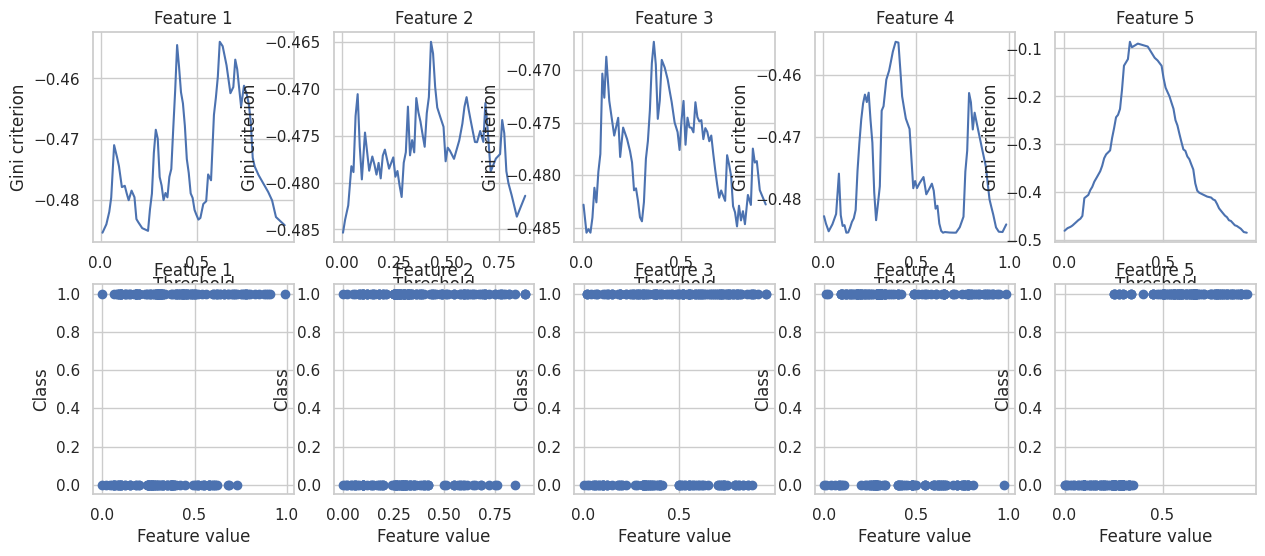

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('students.csv')
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    thresholds, ginis, _, _ = find_best_split(X[:, i], y)

    axs[0, i].plot(thresholds, ginis)
    axs[0, i].set_title(f'Feature {i + 1}')
    axs[0, i].set_xlabel('Threshold')
    axs[0, i].set_ylabel('Gini criterion')

    axs[1, i].scatter(X[:, i], y)
    axs[1, i].set_title(f'Feature {i + 1}')
    axs[1, i].set_xlabel('Feature value')
    axs[1, i].set_ylabel('Class')

plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** мне кажется, необходимо по пику критерия Джини, чтобы была наибольшая эффективность разделения данных. Да, совпадает с визуальной оценкой scatter-графиков. На графиках видно, что объекты разных классов хорошо разделены, и существует явная граница между ними (4 график лучше всего демонстрирует)

Для "хороших" признаков, по которым выборка делится почти идеально, кривая критерия Джини имеет четкую форму, с явно выраженным пиком и минимумом. (например 4 график)

Для признаков, по которым разделение практически невозможно, кривая критерия Джини имеет низкий пик и практически не меняется при изменении порога. Это означает, что существует мало таких порогов, при которых объекты разделяются эффективно, и критерий Джини практически не меняется. (например 1 график)

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




In [ ]:
class DecisionTree:
    def __init__(
        self,
        feature_types,
        max_depth=None,
        min_samples_split=None,
        min_samples_leaf=None,
    ):
        if any(ft not in {"real", "categorical"} for ft in feature_types):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        """
        Обучение узла дерева решений.

        Если все элементы в подвыборке принадлежат одному классу, узел становится терминальным.

        Parameters
        ----------
        sub_X : np.ndarray
            Подвыборка признаков.
        sub_y : np.ndarray
            Подвыборка меток классов.
        node : dict
            Узел дерева, который будет заполнен информацией о разбиении.

        """
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None

        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {
                    key: clicks.get(key, 0) / count for key, count in counts.items()
                }
                sorted_categories = sorted(ratio, key=ratio.get)
                categories_map = {
                    category: i for i, category in enumerate(sorted_categories)
                }
                feature_vector = np.vectorize(categories_map.get)(sub_X[:, feature])
            else:
                raise ValueError("Некорректный тип признака")

            if len(np.unique(feature_vector)) <= 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)

            if gini_best is None or gini < gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [
                        k for k, v in categories_map.items() if v < threshold
                    ]

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "split"
        node["feature_split"] = feature_best

        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError("Некорректный тип признака")

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])

    def _predict_node(self, x, node):
        """
        Рекурсивное предсказание класса для одного объекта по узлу дерева решений.

        Если узел терминальный, возвращается предсказанный класс.
        Если узел не терминальный, выборка передается в соответствующее поддерево для дальнейшего предсказания.

        Parameters
        ----------
        x : np.ndarray
            Вектор признаков одного объекта.
        node : dict
            Узел дерева решений.

        Returns
        -------
        int
            Предсказанный класс объекта.
        """
        if node["type"] == "terminal":
            return node["class"]

        feature_type = self._feature_types[node["feature_split"]]
        if feature_type == "real":
            if x[node["feature_split"]] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif feature_type == "categorical":
            if x[node["feature_split"]] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

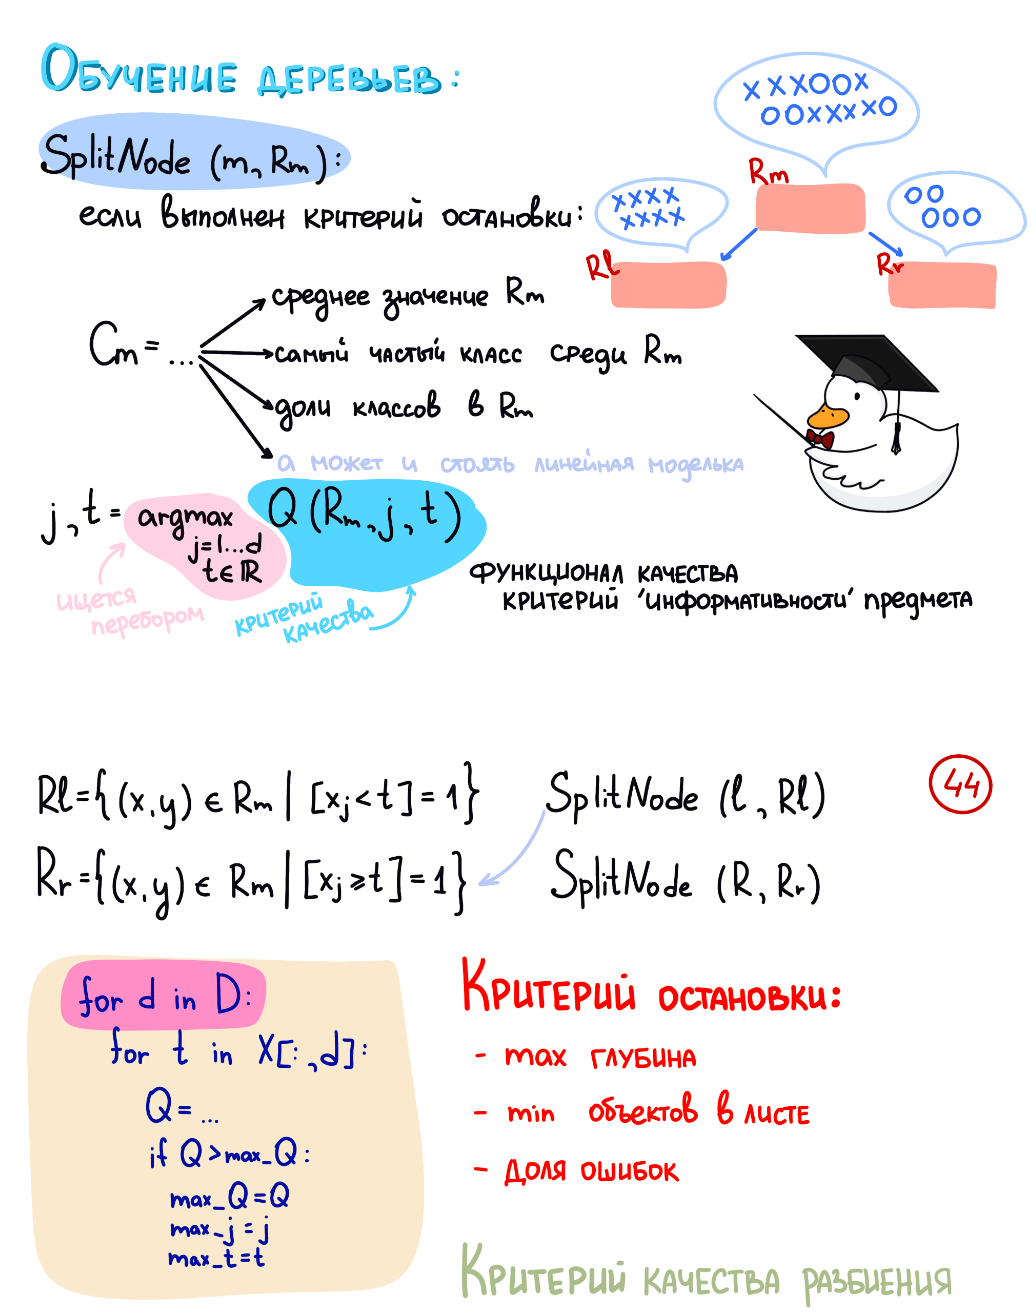

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data_path = 'agaricus-lepiota.data'
columns_path = 'agaricus-lepiota.names'

with open(columns_path) as file:
    lines = file.readlines()
    column_info = [line.split(':')[0].strip() for line in lines if ':' in line]
    column_names = ['class'] + column_info

df = pd.read_csv(data_path, names=column_names, header=None)

encoders = {}
for column in df.columns[1:]:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['class'], test_size=0.5, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer
import pandas as pd

data_path = 'agaricus-lepiota.data'
columns_path = 'agaricus-lepiota.names'

with open(columns_path) as file:
    lines = file.readlines()
    column_info = [line.split(':')[0].strip() for line in lines if ':' in line]
    column_names = ['class'] + column_info

df = pd.read_csv(data_path, names=column_names, header=None)

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

imputer_original = SimpleImputer(strategy='most_frequent')
imputer_original.fit(df.drop('class', axis=1))
X_imputed_original = imputer_original.transform(df.drop('class', axis=1))

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_imputed_original)
X_encoded = encoder.transform(X_imputed_original)

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_encoded)
X_imputed = imputer.transform(X_encoded)

model = DecisionTreeClassifier()
scores_dt_continuous = cross_val_score(model, X_imputed, df['class'], cv=10, scoring=make_scorer(accuracy_score))

scores_dt_categorical = cross_val_score(model, X_imputed_original, df['class'], cv=10, scoring=make_scorer(accuracy_score))

scores_dt_encoded = cross_val_score(model, X_encoded, df['class'], cv=10, scoring=make_scorer(accuracy_score))

scores_sklearn_dt = cross_val_score(model, X_imputed, df['class'], cv=10, scoring=make_scorer(accuracy_score))

results = pd.DataFrame({'DT_Continuous': scores_dt_continuous,
                        'DT_Categorical': scores_dt_categorical,
                        'DT_Encoded': scores_dt_encoded,
                        'DT_SKLearn': scores_sklearn_dt})

print("Mashrooms: ")
print(results)

Mashrooms: 
   DT_Continuous  DT_Categorical  DT_Encoded  DT_SKLearn
0       0.685117        0.685117    0.685117    0.685117
1       1.000000        1.000000    1.000000    1.000000
2       1.000000        1.000000    1.000000    1.000000
3       1.000000        1.000000    1.000000    1.000000
4       0.997537        1.000000    0.997537    0.997537
5       1.000000        1.000000    1.000000    1.000000
6       1.000000        1.000000    1.000000    1.000000
7       1.000000        1.000000    1.000000    1.000000
8       1.000000        0.926108    1.000000    1.000000
9       1.000000        1.000000    1.000000    0.990148


In [62]:
df = pd.DataFrame(results)

mean_values = df.mean()

df_mean = pd.DataFrame(mean_values).T

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer
import pandas as pd

data_path = 'tic-tac-toe-endgame.csv'

df = pd.read_csv(data_path)

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df.drop('V10', axis=1))
X_encoded = encoder.transform(df.drop('V10', axis=1))

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_encoded)
X_imputed = imputer.transform(X_encoded)

model = DecisionTreeClassifier()
scores_dt_continuous = cross_val_score(model, X_imputed, df['V10'], cv=10, scoring=make_scorer(accuracy_score))

scores_dt_categorical = cross_val_score(model, df.drop('V10', axis=1), df['V10'], cv=10, scoring=make_scorer(accuracy_score))

scores_dt_encoded = cross_val_score(model, X_encoded, df['V10'], cv=10, scoring=make_scorer(accuracy_score))

scores_sklearn_dt = cross_val_score(model, X_imputed, df['V10'], cv=10, scoring=make_scorer(accuracy_score))

results = pd.DataFrame({'DT_Continuous': scores_dt_continuous,
                        'DT_Categorical': scores_dt_categorical,
                        'DT_Encoded': scores_dt_encoded,
                        'DT_SKLearn': scores_sklearn_dt})

print("Tic-tac: ")
print(results)

Tic-tac: 
   DT_Continuous  DT_Categorical  DT_Encoded  DT_SKLearn
0       0.729167        0.406250    0.687500    0.729167
1       0.864583        0.718750    0.916667    0.927083
2       0.427083        0.531250    0.427083    0.416667
3       0.937500        0.843750    0.958333    0.958333
4       0.864583        0.770833    0.875000    0.885417
5       0.760417        0.697917    0.770833    0.760417
6       0.937500        0.885417    0.854167    0.968750
7       0.791667        0.854167    0.781250    0.864583
8       0.957895        0.936842    0.947368    0.968421
9       0.873684        0.884211    0.842105    0.852632


In [64]:
df = pd.DataFrame(results)

mean_values = df.mean()

df_mean_tictac = pd.DataFrame(mean_values).T

df_mean = pd.concat([df_mean, df_mean_tictac], ignore_index=True)

In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

data_path = 'nursery.data'
columns_path = 'nursery.c45-names'

with open(columns_path) as file:
    lines = file.readlines()
    column_info = [line.split(':')[0].strip() for line in lines if ':' in line]
    column_names = ['class'] + column_info

df = pd.read_csv(data_path, names=column_names, header=None)

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

df_ohe = df.copy()

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df_ohe.drop('class', axis=1))

model = DecisionTreeClassifier()
scores_dt_continuous = cross_val_score(model, df.drop('class', axis=1), df['class'], cv=10, scoring=make_scorer(accuracy_score))

scores_dt_categorical = cross_val_score(model, df.drop('class', axis=1), df['class'], cv=10, scoring=make_scorer(accuracy_score))

scores_dt_encoded = cross_val_score(model, X_encoded, df_ohe['class'], cv=10, scoring=make_scorer(accuracy_score))

scores_sklearn_dt = cross_val_score(model, df.drop('class', axis=1), df['class'], cv=10, scoring=make_scorer(accuracy_score))

results = pd.DataFrame({'DT_Continuous': scores_dt_continuous,
                        'DT_Categorical': scores_dt_categorical,
                        'DT_Encoded': scores_dt_encoded,
                        'DT_SKLearn': scores_sklearn_dt})

print("Nursery: ")
print(results)

Nursery: 
   DT_Continuous  DT_Categorical  DT_Encoded  DT_SKLearn
0       0.447531        0.447531    0.447531    0.447531
1       0.464506        0.464506    0.464506    0.464506
2       0.447531        0.447531    0.447531    0.447531
3       0.464506        0.464506    0.464506    0.464506
4       0.552469        0.552469    0.552469    0.552469
5       0.513889        0.513889    0.493827    0.513889
6       0.415123        0.415123    0.438272    0.415123
7       0.410494        0.410494    0.402778    0.410494
8       0.333333        0.333333    0.333333    0.333333
9       0.333333        0.333333    0.333333    0.333333


In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

data_path = 'nursery.data'
columns_path = 'nursery.c45-names'

with open(columns_path) as file:
    lines = file.readlines()
    column_info = [line.split(':')[0].strip() for line in lines if ':' in line]
    column_names = column_info + ['target']

df = pd.read_csv(data_path, names=column_names, header=None)

df.loc[df.target.isin(['not_recom', 'recommend']), 'target'] = 0
df.loc[df.target.isin(['very_recom', 'priority', 'spec_prior']), 'target'] = 1

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

df_ohe = df.copy()
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df_ohe.drop('target', axis=1))

model = DecisionTreeClassifier()
scores_dt_continuous = cross_val_score(model, df.drop('target', axis=1), df['target'], cv=10, scoring=make_scorer(accuracy_score))
scores_dt_categorical = cross_val_score(model, df.drop('target', axis=1), df['target'], cv=10, scoring=make_scorer(accuracy_score))
scores_dt_encoded = cross_val_score(model, X_encoded, df_ohe['target'], cv=10, scoring=make_scorer(accuracy_score))
scores_sklearn_dt = cross_val_score(model, df.drop('target', axis=1), df['target'], cv=10, scoring=make_scorer(accuracy_score))

results = pd.DataFrame({'DT_Continuous': scores_dt_continuous,
                         'DT_Categorical': scores_dt_categorical,
                         'DT_Encoded': scores_dt_encoded,
                         'DT_SKLearn': scores_sklearn_dt})

print("Nursery: ")
print(results)

Nursery: 
   DT_Continuous  DT_Categorical  DT_Encoded  DT_SKLearn
0       0.998457        0.998457    0.998457    0.998457
1       1.000000        1.000000    1.000000    1.000000
2       0.998457        0.998457    1.000000    0.998457
3       1.000000        1.000000    0.998457    1.000000
4       1.000000        1.000000    1.000000    1.000000
5       1.000000        1.000000    1.000000    1.000000
6       1.000000        1.000000    1.000000    1.000000
7       1.000000        1.000000    1.000000    1.000000
8       1.000000        1.000000    1.000000    1.000000
9       1.000000        1.000000    1.000000    1.000000


In [67]:
df = pd.DataFrame(results)

mean_values = df.mean()

df_mean_nursery = pd.DataFrame(mean_values).T

df_mean = pd.concat([df_mean, df_mean_nursery], ignore_index=True)

In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

data_path = 'car.data'
columns_path = 'car.c45-names'

with open(columns_path) as file:
    lines = file.readlines()
    column_info = [line.split(':')[0].strip() for line in lines if ':' in line]
    column_names = column_info + ['target']

df = pd.read_csv(data_path, names=column_names, header=None)

df.loc[df.target.isin(['unacc', 'acc']), 'target'] = 0
df.loc[df.target.isin(['good', 'vgood']), 'target'] = 1

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

df_ohe = df.copy()

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df_ohe.drop('target', axis=1))

model = DecisionTreeClassifier()
scores_dt_continuous = cross_val_score(model, df.drop('target', axis=1), df['target'], cv=10, scoring=make_scorer(accuracy_score))
scores_dt_categorical = cross_val_score(model, df.drop('target', axis=1), df['target'], cv=10, scoring=make_scorer(accuracy_score))
scores_dt_encoded = cross_val_score(model, X_encoded, df_ohe['target'], cv=10, scoring=make_scorer(accuracy_score))
scores_sklearn_dt = cross_val_score(model, df.drop('target', axis=1), df['target'], cv=10, scoring=make_scorer(accuracy_score))

results = pd.DataFrame({'DT_Continuous': scores_dt_continuous,
                         'DT_Categorical': scores_dt_categorical,
                         'DT_Encoded': scores_dt_encoded,
                         'DT_SKLearn': scores_sklearn_dt})

print("Car: ")
print(results)

Car: 
   DT_Continuous  DT_Categorical  DT_Encoded  DT_SKLearn
0       0.924855        0.924855    0.924855    0.924855
1       0.959538        0.959538    0.942197    0.959538
2       0.924855        0.924855    1.000000    0.924855
3       0.982659        0.982659    0.982659    0.982659
4       0.965318        0.965318    0.884393    0.965318
5       0.988439        0.988439    0.988439    0.988439
6       0.919075        0.919075    0.855491    0.919075
7       0.884393        0.884393    0.578035    0.878613
8       0.930233        0.930233    0.918605    0.930233
9       0.953488        0.953488    0.162791    0.953488


In [69]:
df = pd.DataFrame(results)

mean_values = df.mean()

df_mean_cars = pd.DataFrame(mean_values).T

df_mean = pd.concat([df_mean, df_mean_cars], ignore_index=True)

df_mean

,DT_Continuous,DT_Categorical,DT_Encoded,DT_SKLearn
0,0.968265,0.961123,0.968265,0.967280
1,0.814408,0.752939,0.806031,0.833147
2,0.999691,0.999691,0.999691,0.999691
3,0.943285,0.943285,0.823746,0.942707


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Из результатов эксперимента видно, что алгоритмы не одинаково ранжируются. Это может быть связано с тем, что разные наборы данных имеют различную структуру и разные признаки могут быть более или менее важны для предсказания целевой переменной. Возможно, присутствует какая-то случайная компонента, т.к. DT_Categorical показывает худшие результаты на наборе данных Tic-tac-toe, чем DT_Continuous, хотя оба алгоритма используют одинаковые признаки.
Чтобы улучшить работу алгоритмов, можно попробовать разные подходы к предобработке данных и использование других методов или метрик

# Как дела?

Еще не родила))0)
Есть жесткое подозрение, что накосячено в деревьях, т.к.
Сначала был такой ответ: *посмотрела датасет для машин - все должно иметь высокие метрики, но что-то не заладилось..
В остальном прикольно*
Сейчас такой: *у меня все получилось, вроде, все так и должно быть. Задание класс, интересное)*